# 분류와 회귀(regression)
* 지도 학습 알고리즘은 크게 분류와 회귀로 나눱니다. 
* 분류는 말 그대로 샘플을 몇 개의 클래스 중 하나로 분류하는 문제입니다. 
* 회귀는 클래스 중 하나로 분류하는 것이 아니라 임의의 어떤 숫자를 예측하는 문제입니다. 
* 예를 들면 내년도 경제 성장률을 예측하거나 배달이 도착할 시간을 예측하는 것이 회귀 문제입니다. 

## 이 챕터의 내용 
* 해당 챕터에서는 농어의 무게를 예측하는 내용입니다.

# k-최근접 이웃 회귀
* k-NN 알고리즘을 분류일 때는 아래와 같이 사용합니다. 

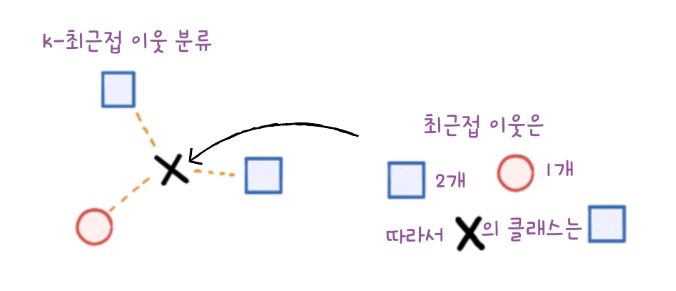

* 회귀에서 사용할 때도 분류와 똑같이 예측하려는 샘플에 가장 가까운 샘플 K개를 선택합니다. 
* 하지만 회귀이기 때문에 이웃한 샘플의 타깃은 어떤 클래스가 아니라 임의의 수치입니다. 
* 새로운 샘플 x의 타깃을 예측하는 방법으로 근접한 값의 평균을 사용합니다. 

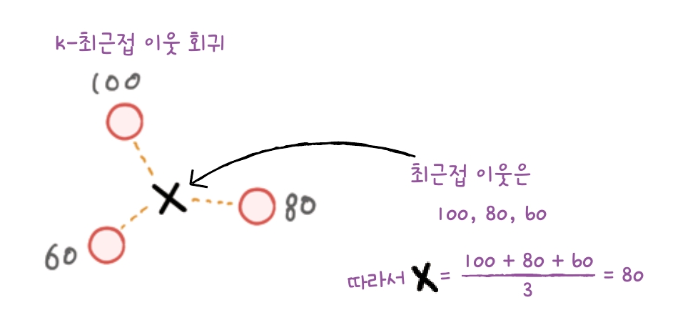

<table align="left">
  <td>
    <a target="_blank" href="https://colab.research.google.com/github/rickiepark/hg-mldl/blob/master/3-1.ipynb"><img src="https://www.tensorflow.org/images/colab_logo_32px.png" />구글 코랩에서 실행하기</a>
  </td>
</table>

## 데이터 준비

In [1]:
import numpy as np

In [2]:
perch_length = np.array(
    [8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 
     21.0, 21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 
     22.5, 22.7, 23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 
     27.3, 27.5, 27.5, 27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 
     36.5, 36.0, 37.0, 37.0, 39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 
     40.0, 42.0, 43.0, 43.0, 43.5, 44.0]
     )
perch_weight = np.array(
    [5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 
     110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
     130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 
     197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
     514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
     820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 
     1000.0, 1000.0]
     )

In [3]:
import matplotlib.pyplot as plt

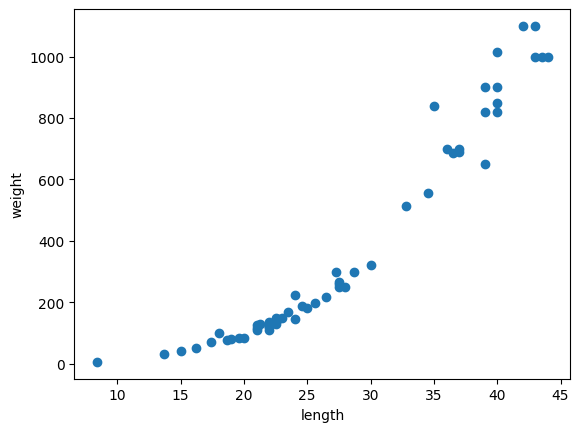

In [4]:
plt.scatter(perch_length, perch_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train_input, test_input, train_target, test_target = train_test_split(
    perch_length, perch_weight, random_state=42)

* 사이킷런에 사용할 훈련 세트는 2차원 배열이어야 한다는 점에 주의하세요.

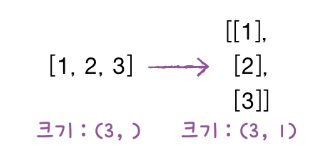

In [7]:
print(train_input.shape, test_input.shape)

(42,) (14,)


In [8]:
test_array = np.array([1,2,3,4])
print(test_array.shape)

(4,)


* 넘파이의 reshape 함수를 사용해서 구조를 변경할수 있습니다. 
* 자주 사용하는 함수이니 기억해주세요 

In [9]:
test_array = test_array.reshape(2, 2)
print(test_array.shape)

(2, 2)


In [10]:
test_array

array([[1, 2],
       [3, 4]])

In [11]:
np.arange(16).shape
np.arange(16).ndim #리스트는 1차원이다
np.arange(16).reshape(2,8)
np.arange(100).reshape(25,4)
np.arange(100).reshape(-1,20)

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
        16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35,
        36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55,
        56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75,
        76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95,
        96, 97, 98, 99]])

In [12]:
# 아래 코드의 주석을 제거하고 실행하면 에러가 발생합니다
#test_array = test_array.reshape(2, 3)

* reshape(-1, 1)과 같이 사용하면 배열의 전체 원소 개수를 매번 외우지 않아도 되므로 편리합니다. 
* -1을 지정하면 나머지 원소 개수로 모두 채우라는 의미, 첫 번째 크기를 나머지 원소 개수로 채우고, 두 번째 크기를 1로 생성

In [13]:
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

In [14]:
print(train_input.shape, test_input.shape)

(42, 1) (14, 1)


## 결정 계수 ($ R^2$)
* 회귀의 경우 평가 방법이 분류와 다릅니다. 
* 결정계수(coefficient of determination)로 평가합니다.

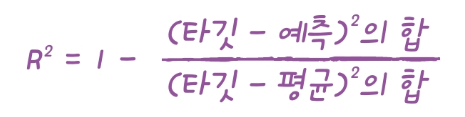

* 각 샘플의 타깃과 예측한 값의 차이를 제곱하여 더합니다. 그 다음 타깃과 타깃 평균의 차이를 제곱하여 더한 값으로 나눕니다. 
* 만약 타깃의 평균 정도를 예측하는 수준이라면 (즉 분자와 분모가 비슷해져) $ R^2$는 0에 가까워지고, 예측이 타깃에 아주 가까워지면 (분자가 0에 가까워지기 때문에) 1에 가까운 값이 됩니다.

In [15]:
from sklearn.neighbors import KNeighborsRegressor
# KNeighborsClassifier

In [16]:
knr = KNeighborsRegressor()
# k-최근접 이웃 회귀 모델을 훈련합니다
knr.fit(train_input, train_target)

KNeighborsRegressor()

In [29]:
train_input[0]

array([19.6])

In [31]:
knr.predict([[23]])

array([148.])

In [32]:
import pickle 

with open("./model_knn_reg.pkl","wb") as f:
    pickle.dump(knr,f)

#장고로 api불러와서 숫자를 물어보면 알려준다 회귀

In [17]:
knr.score(test_input, test_target)

0.992809406101064

* $ R^2$가 직관적으로 얼마나 좋은지 이해하기는 어렵습니다. 대신 다른 값을 사용해서 평가해봅시다.
* mean_abolute_error는 타깃과 예측의 절댓값 오차를 평균하여 반환합니다.

In [18]:
from sklearn.metrics import mean_absolute_error

In [19]:
# 테스트 세트에 대한 예측을 만듭니다
test_prediction = knr.predict(test_input)
# 테스트 세트에 대한 평균 절댓값 오차를 계산합니다
mae = mean_absolute_error(test_target, test_prediction)
print(mae)

19.157142857142862


In [20]:
test_target

array([   5.9,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  300. ])

In [21]:
tmp = np.array([   10,  100. ,  250. ,  130. ,  130. ,  820. ,  320. ,  188. ,
        900. ,  125. , 1000. ,   51.5,  250. ,  290. ])

In [22]:
mean_absolute_error(test_target, tmp)

1.0071428571428571

In [23]:
test_prediction

array([  60. ,   79.6,  248. ,  122. ,  136. ,  847. ,  311.4,  183.4,
        847. ,  113. , 1010. ,   60. ,  248. ,  248. ])

In [24]:
sum(abs(test_target - test_prediction))/14

19.157142857142862

## 과대적합 vs 과소적합

* 앞에서 훈련한 모델을 사용해 훈련 세트의 $ R^2$ 점수를 확인하겠습니다.

In [25]:
print(knr.score(train_input, train_target))

0.9698823289099254


### 과대적합(overfitting)
* 훈련 세트에서 점수가 굉장히 좋았는데 테스트 세트에서는 점수가 굉장히 나쁘다면 모델이 훈련 세트에 과대적합되었다고 말합니다. 
* 훈련 세트에만 잘 맞는 모델이라 테스트 세트와 나중에 실전에 투입하여 새로운 샘플에 대한 예측을 만들 때 잘 동작하지 않습니다. 

### 과소적합(underfitting)
* 훈련 세트보다 테스트 세트의 점수가 높거나 두 점수가 모두 낮은 경우는 과소적합되었다고 합니다. 
* 즉 모델이 너무 단순하여 훈련 세트에 적절히 훈련되지 않은 경우입니다. 

* 훈련 세트와 테스트 세트의 점수를 비교했을 때 훈련 세트가 너무 높으면 과대적합, 그 반대이거나 두 점수가 모두 낮으면 과소적합 

### 왜 과소적합이 일어나는가?
* 또 원인 중 하나는 훈련 세트와 테스트 세트의 크기가 매우 작아도 발생합니다. 

### 문제 해결
##### 과소적합일 때 
* 모델을 좀더 복잡하게 만들어서 해결해보겠습니다. 
* K-NN에서 K의 값을 즐이면 모델을 더 복잡하게 만들수 있습니다. 
* 이웃의 개수를 줄이면 훈련 세트에 있는 국지적인 패턴에 민감해지고, 이웃의 개수를 늘리면 데이터 전반에 있는 일반적인 패턴을 따를 것입니다. 
--------
##### 과대적합일 때
* 과대적합일 경우 모델을 덜 복잡하게 만들어야 합니다. 
* K-NN의 경우 k 값을 늘립니다. 

In [26]:
# 이웃의 갯수를 3으로 설정합니다
knr.n_neighbors = 3
# 모델을 다시 훈련합니다
knr.fit(train_input, train_target)
print(knr.score(train_input, train_target))

0.9804899950518966


In [27]:
print(knr.score(test_input, test_target))

0.9746459963987609


## 확인문제

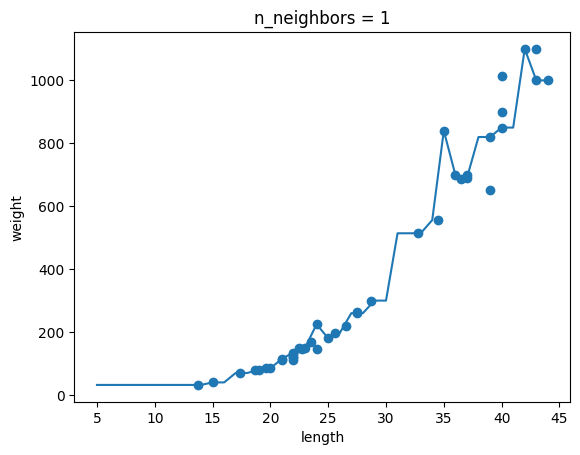

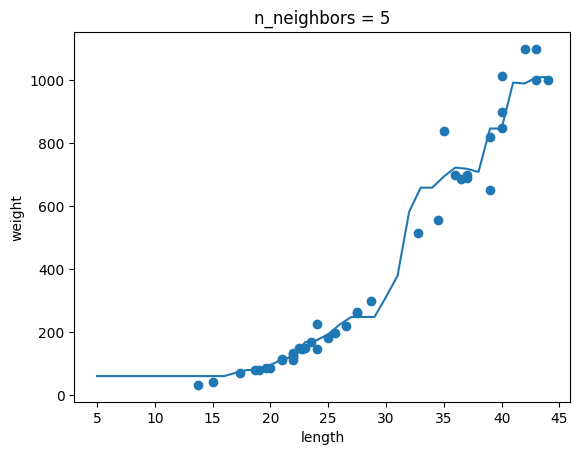

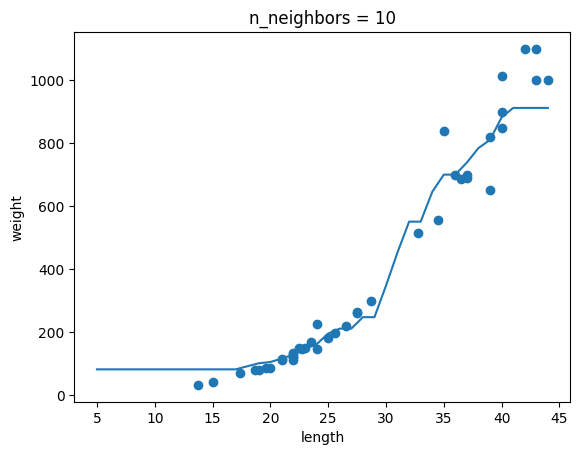

In [28]:
# k-최근접 이웃 회귀 객체를 만듭니다
knr = KNeighborsRegressor()
# 5에서 45까지 x 좌표를 만듭니다
x = np.arange(5, 45).reshape(-1, 1)

# n = 1, 5, 10일 때 예측 결과를 그래프로 그립니다.
for n in [1, 5, 10]:
    # 모델 훈련
    knr.n_neighbors = n
    knr.fit(train_input, train_target)
    # 지정한 범위 x에 대한 예측 구하기 
    prediction = knr.predict(x)
    # 훈련 세트와 예측 결과 그래프 그리기
    plt.scatter(train_input, train_target)
    plt.plot(x, prediction)
    plt.title('n_neighbors = {}'.format(n))    
    plt.xlabel('length')
    plt.ylabel('weight')
    plt.show()